# Unveiling the World: Exploring GeoSpatial Data

# World GeoSpatial Data

## Installing & Importing Libraries

In [1]:
%%capture
!pip install geopandas
!pip install geoplot

In [2]:
import geopandas as gpd

## Loading Data

In [3]:
world_data = gpd.read_file('Data/world.shp')

## Exploring Data

In [4]:
world_data.head()

,FIPS,ISO2,ISO3,UN,NAME,AREA,POP2005,REGION,SUBREGION,LON,LAT,geometry
0,AC,AG,ATG,28,Antigua and Barbuda,44,83039,19,29,-61.783,17.078,"MULTIPOLYGON (((-61.68667 17.02444, -61.73806 ..."
1,AG,DZ,DZA,12,Algeria,238174,32854159,2,15,2.632,28.163,"POLYGON ((2.96361 36.80222, 2.98139 36.80694, ..."
2,AJ,AZ,AZE,31,Azerbaijan,8260,8352021,142,145,47.395,40.430,"MULTIPOLYGON (((45.08332 39.76804, 45.26639 39..."
3,AL,AL,ALB,8,Albania,2740,3153731,150,39,20.068,41.143,"POLYGON ((19.43621 41.02107, 19.45055 41.06000..."
4,AM,AM,ARM,51,Armenia,2820,3017661,142,145,44.563,40.534,"MULTIPOLYGON (((45.57305 40.63249, 45.52888 40..."


In [5]:
world_data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [6]:
world_data.NAME

,NAME
0,Antigua and Barbuda
1,Algeria
2,Azerbaijan
3,Albania
4,Armenia
...,...
241,Saint Barthelemy
242,Guernsey
243,Jersey
244,South Georgia South Sandwich Islands


In [7]:
world_data['planet'] = 'Earth'

In [8]:
world_data.head()

,FIPS,ISO2,ISO3,UN,NAME,AREA,POP2005,REGION,SUBREGION,LON,LAT,geometry,planet
0,AC,AG,ATG,28,Antigua and Barbuda,44,83039,19,29,-61.783,17.078,"MULTIPOLYGON (((-61.68667 17.02444, -61.73806 ...",Earth
1,AG,DZ,DZA,12,Algeria,238174,32854159,2,15,2.632,28.163,"POLYGON ((2.96361 36.80222, 2.98139 36.80694, ...",Earth
2,AJ,AZ,AZE,31,Azerbaijan,8260,8352021,142,145,47.395,40.430,"MULTIPOLYGON (((45.08332 39.76804, 45.26639 39...",Earth
3,AL,AL,ALB,8,Albania,2740,3153731,150,39,20.068,41.143,"POLYGON ((19.43621 41.02107, 19.45055 41.06000...",Earth
4,AM,AM,ARM,51,Armenia,2820,3017661,142,145,44.563,40.534,"MULTIPOLYGON (((45.57305 40.63249, 45.52888 40...",Earth


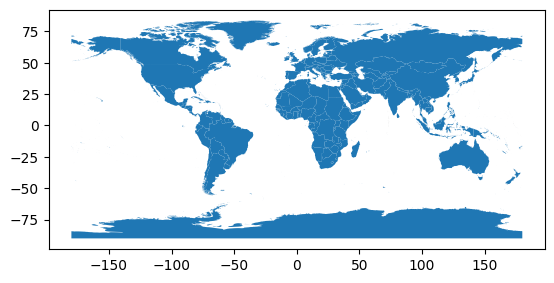

In [9]:
world_data.plot();

## Feature Engineering

In [10]:
world_data.to_crs(epsg=3857, inplace=True)

#### Area of all Countries

In [11]:
world_data['area'] = world_data.area/1000000 # in km2
world_data[['NAME', 'area']]

,NAME,area
0,Antigua and Barbuda,5.993606e+02
1,Algeria,3.014479e+06
2,Azerbaijan,1.478874e+05
3,Albania,5.062603e+04
4,Armenia,5.104906e+04
...,...,...
241,Saint Barthelemy,6.120432e+01
242,Guernsey,1.784360e+02
243,Jersey,2.923165e+02
244,South Georgia South Sandwich Islands,1.162403e+04


#### Centroid of all Countries

In [12]:
world_data['centroid'] = world_data.centroid
world_data[['NAME', 'centroid']]

,NAME,centroid
0,Antigua and Barbuda,POINT (-6878558.427 1953531.541)
1,Algeria,POINT (292673.337 3302620.677)
2,Azerbaijan,POINT (5291186.956 4910295.936)
3,Albania,POINT (2233888.272 5035236.198)
4,Armenia,POINT (5003116.123 4908656.708)
...,...,...
241,Saint Barthelemy,POINT (-7020023.455 2043031.445)
242,Guernsey,POINT (-286738.480 6353116.538)
243,Jersey,POINT (-236990.882 6312190.514)
244,South Georgia South Sandwich Islands,POINT (-3990668.357 -7305137.415)


#### Boundary of all Countries

In [13]:
world_data['boundary'] = world_data.boundary
world_data[['NAME', 'boundary']]

,NAME,boundary
0,Antigua and Barbuda,"MULTILINESTRING ((-6866928.470 1923670.302, -6..."
1,Algeria,"LINESTRING (329907.556 4411573.988, 331886.705..."
2,Azerbaijan,"MULTILINESTRING ((5018652.337 4832292.097, 503..."
3,Albania,"LINESTRING (2163629.445 5015449.243, 2165225.7..."
4,Armenia,"MULTILINESTRING ((5073168.831 4958283.927, 506..."
...,...,...
241,Saint Barthelemy,"LINESTRING (-7016282.269 2039369.076, -7016839..."
242,Guernsey,"LINESTRING (-288410.322 6346856.058, -289121.4..."
243,Jersey,"LINESTRING (-224308.774 6311279.152, -224989.0..."
244,South Georgia South Sandwich Islands,"MULTILINESTRING ((-3041898.149 -8273304.771, -..."


In [14]:
world_data.head()

,FIPS,ISO2,ISO3,UN,NAME,AREA,POP2005,REGION,SUBREGION,LON,LAT,geometry,planet,area,centroid,boundary
0,AC,AG,ATG,28,Antigua and Barbuda,44,83039,19,29,-61.783,17.078,"MULTIPOLYGON (((-6866928.470 1923670.302, -687...",Earth,5.993606e+02,POINT (-6878558.427 1953531.541),"MULTILINESTRING ((-6866928.470 1923670.302, -6..."
1,AG,DZ,DZA,12,Algeria,238174,32854159,2,15,2.632,28.163,"POLYGON ((329907.556 4411573.988, 331886.705 4...",Earth,3.014479e+06,POINT (292673.337 3302620.677),"LINESTRING (329907.556 4411573.988, 331886.705..."
2,AJ,AZ,AZE,31,Azerbaijan,8260,8352021,142,145,47.395,40.430,"MULTIPOLYGON (((5018652.337 4832292.097, 50390...",Earth,1.478874e+05,POINT (5291186.956 4910295.936),"MULTILINESTRING ((5018652.337 4832292.097, 503..."
3,AL,AL,ALB,8,Albania,2740,3153731,150,39,20.068,41.143,"POLYGON ((2163629.445 5015449.243, 2165225.767...",Earth,5.062603e+04,POINT (2233888.272 5035236.198),"LINESTRING (2163629.445 5015449.243, 2165225.7..."
4,AM,AM,ARM,51,Armenia,2820,3017661,142,145,44.563,40.534,"MULTIPOLYGON (((5073168.831 4958283.927, 50682...",Earth,5.104906e+04,POINT (5003116.123 4908656.708),"MULTILINESTRING ((5073168.831 4958283.927, 506..."


#### Largest Country by Area

In [15]:
world_data = world_data[world_data['NAME'] != 'Antarctica']

In [16]:
largest_country = world_data.loc[world_data['area'].idxmax()]

In [17]:
largest_country

,174
FIPS,RS
ISO2,RU
ISO3,RUS
UN,643
NAME,Russia
AREA,1638094
POP2005,143953092
REGION,150
SUBREGION,151
LON,96.689


## Data Visualization

#### Plotting Map of India

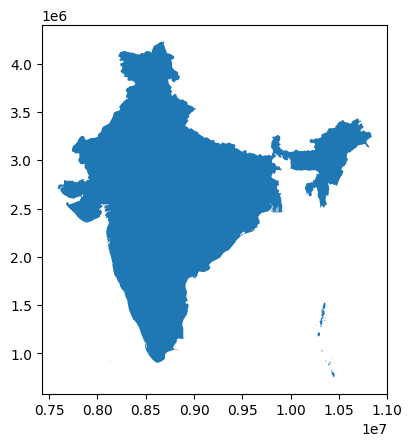

In [18]:
world_data[world_data.NAME == "India"].plot();

#### Plotting Map of Japan

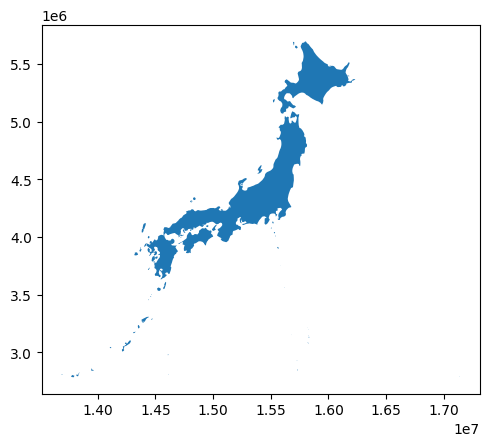

In [19]:
world_data[world_data['NAME'] == 'Japan'].plot();

#### Plotting World Map

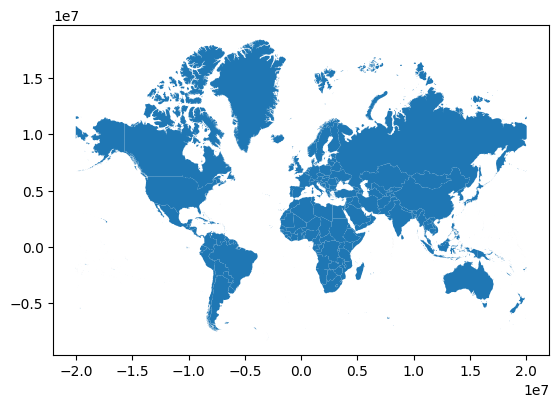

In [20]:
world_data.plot();

# Indian Districts GeoSpatial Data

## Loading Data

In [21]:
india_districts = gpd.read_file("Data/india_district.geojson")

## Exploring Data

In [22]:
india_districts.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,NL_NAME_2,VARNAME_2,TYPE_2,ENGTYPE_2,geometry
0,105,IND,India,1,Andaman and Nicobar,1,Andaman Islands,None,None,District,District,"MULTIPOLYGON (((92.51583 10.89764, 92.51611 10..."
1,105,IND,India,1,Andaman and Nicobar,2,Nicobar Islands,None,None,District,District,"MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8..."
2,105,IND,India,2,Andhra Pradesh,3,Adilabad,None,None,District,District,"POLYGON ((78.33625 19.88319, 78.34669 19.88140..."
3,105,IND,India,2,Andhra Pradesh,4,Anantapur,None,"Anantpur, Ananthapur",District,District,"POLYGON ((77.69000 15.17628, 77.69378 15.17347..."
4,105,IND,India,2,Andhra Pradesh,5,Chittoor,None,Chitoor|Chittor,District,District,"POLYGON ((78.47611 13.93680, 78.48208 13.93007..."


In [23]:
india_districts.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## Data Visualization

#### All Districts plot

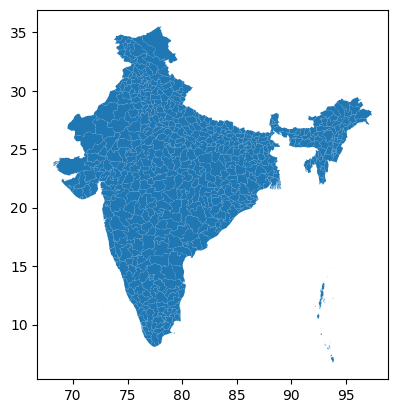

In [24]:
india_districts.plot();

#### All Districts color separated plot

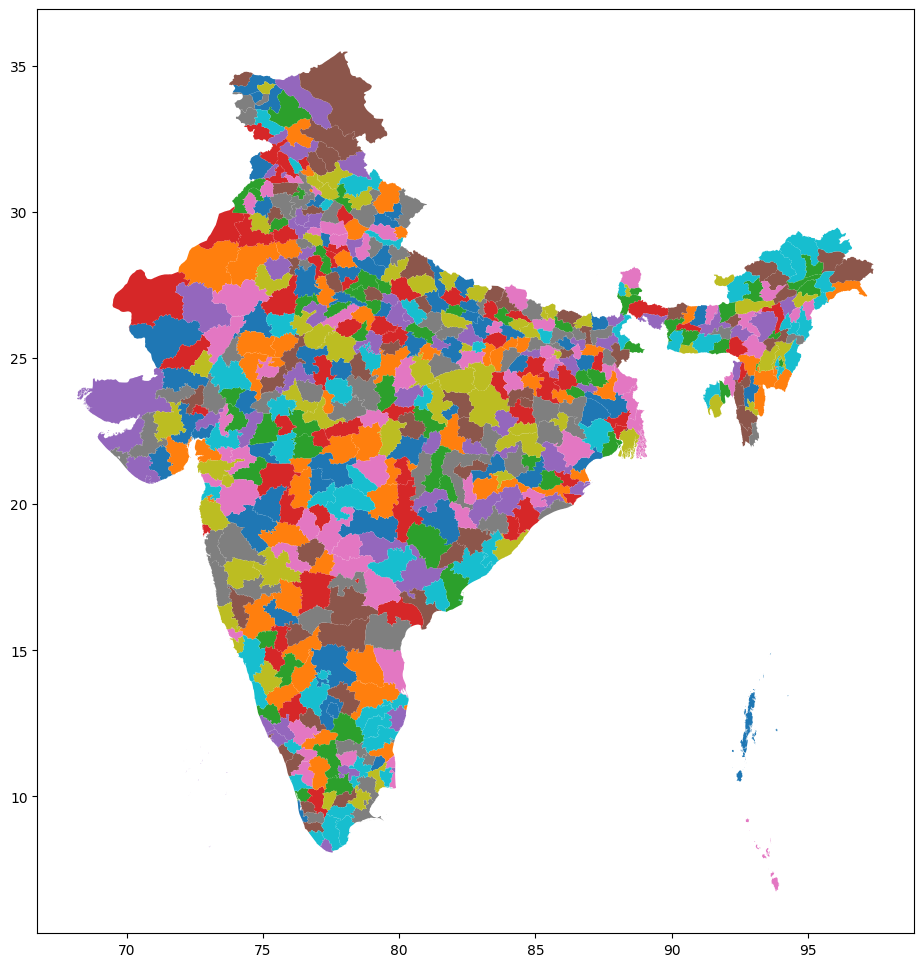

In [25]:
india_districts.plot(column='NAME_2', figsize=(16,12), legend=False);

#### States & Districts color plot

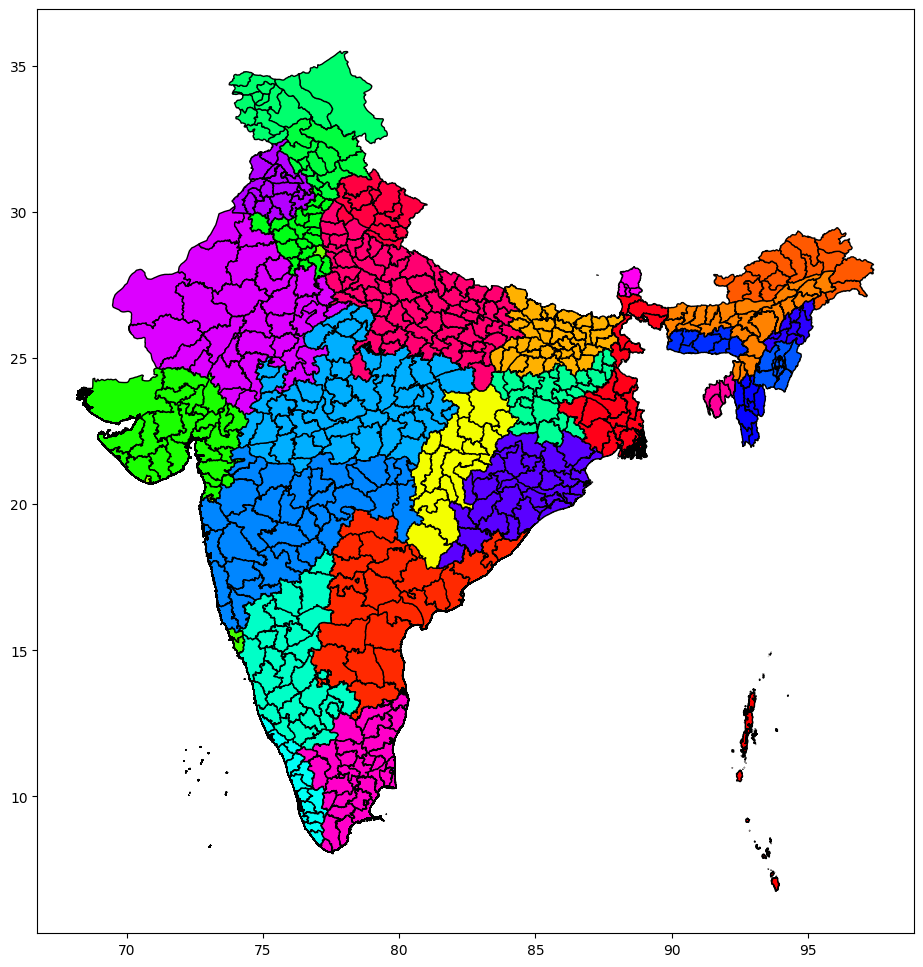

In [26]:
india_districts.plot(column='NAME_1', cmap='hsv', figsize=(16,12), edgecolor='black');

#### Districts & Area distribution

In [27]:
india_districts.to_crs(epsg=3857, inplace=True)

In [28]:
india_districts['area'] = india_districts.area/1000000

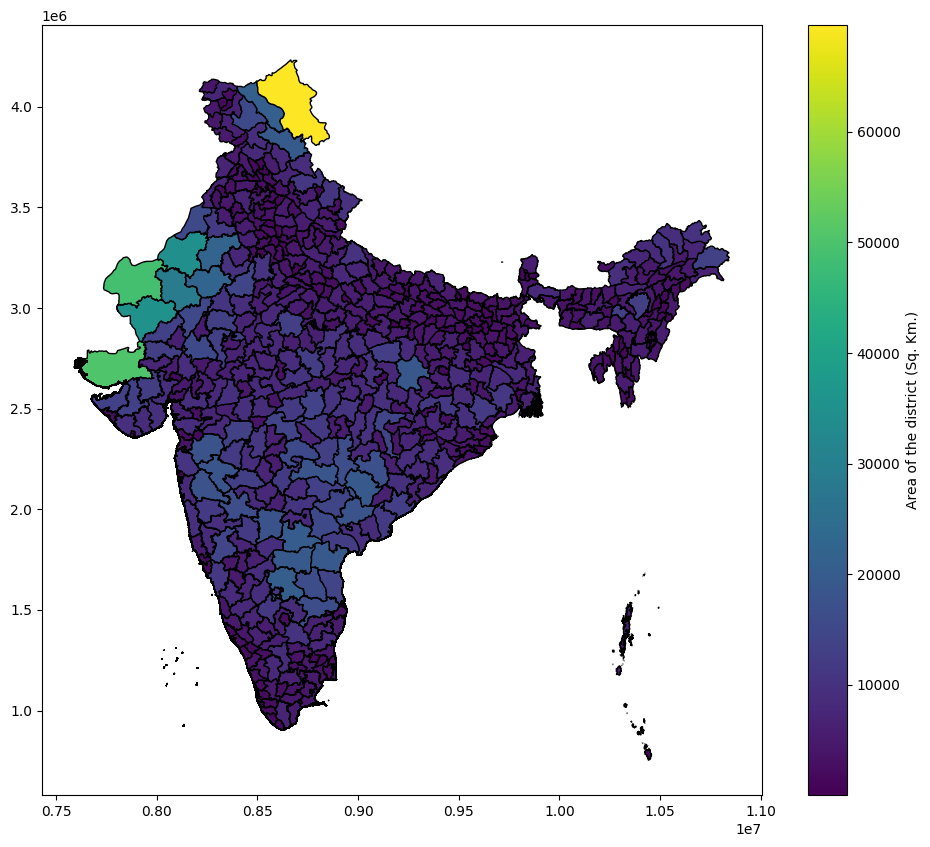

In [29]:
india_districts.plot(column='area', edgecolor='black', legend=True,
                     legend_kwds={'label': "Area of the district (Sq. Km.)"}, figsize=(12, 10));